<img src="https://pdroruiz.com/wp-content/uploads/2024/04/breast-cancer.jpg" title="Breast Cancer Prediction" style="display: block; margin-left: auto; margin-right: auto;" />

# Breast Cancer Prediction

[Pedro Ruiz](https://pdroruiz.com/) - April 2024

[Kaggle](https://www.kaggle.com/pdroruiz) / [Portfolio](https://pdroruiz.com/portfolio/)

---

Breast cancer is one of the most common and deadly diseases affecting women worldwide. It represents a major threat to women's health, with millions of new cases diagnosed each year. 
Early and accurate detection is crucial to improve the survival rate and quality of life of patients.

In this context, data analytics and data science play an increasingly important role. The great advances that have been made in recent years in these areas are enabling researchers and clinicians to gain new insights and better understand this disease. 
Through the analysis of large datasets, such as the dataset we will be working on, we can discover patterns and trends that may not be evident and processed with the naked eye.

This particular analysis focuses on breast cancer prediction. This dataset contains features derived from digitized images of biopsied breast masses, with confirmed diagnoses of malignant or benign tissue. 
Our goal will be to use data science techniques to analyze them and develop a predictive model that can aid in the early and accurate diagnosis of breast cancer.

This work is just a small sample of how data science advances can contribute to the fight against cancer and save lives. Although models cannot replace the expertise and judgment of medical professionals, they can serve as a valuable tool to aid in diagnosis and treatment.

We hope not only to develop an effective predictive model, but also to raise awareness of breast cancer and highlight the importance of early detection. 

**Please don't forget UPVOTE** ✌️

---

## Description of the author:
Breast cancer is the most common cancer among women worldwide. It accounts for 25% of all cancer cases and affected more than 2.1 million people in 2015 alone. It begins when cells in the breast start to grow out of control. These cells often form tumors that can be seen by X-ray or perceived as lumps in the breast area.

The main problem in detecting them is how to classify the tumors as malignant (cancerous) or benign (non-cancerous). We ask you to complete the analysis of the classification of these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset.

### Acknowledgments:
This dataset has been forwarded from Kaggle.

### Objective:
- To understand the dataset and clean it (if necessary).
- Build classification models to predict whether the cancer type is malignant or benign.
- Also refine the hyperparameters and compare the evaluation metrics of various classification algorithms.

---

## Data preview

### Import of modules and libraries

In [3]:
import numpy as np 
import pandas as pd  

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Import of the dataset

In [4]:
file_path = 'data/breast-cancer.csv'

data = pd.read_csv(file_path)

data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


A first impression of the data shows that it contains several characteristics that are fundamental for the detection and classification of tumors in radiographs. Next, we will analyze each of these characteristics.

Analysis of the exposed data:

- `Diagnosis`: It is the diagnosis of tumors, where "M" represents malignant (cancer) and "B" represents benign (non-cancer).
- `Average_radius`: The average radius of the tumor, which is calculated from the perimeter and area of the tumor.
- `Average_Texture`: A measure of the gray scale variation of the pixels in the tumor image.
- `Average_perimeter`: It is the average perimeter of the tumor.
- `Average_area`: It is the average area of the tumor.
- `Average_Smoothness`: It is a measure of local variations in the lengths of the tumor radii.
- `Average_compactness`: The squared perimeter of the tumor divided by the tumor area minus 1.0.
- `Mean_concavity`: The severity of the concave portions of the tumor outline.
- `Mean_concave_points`: The number of concave portions of the tumor outline.
- `Median_symmetry`: A measure of the symmetry of the tumor.
- `Median_fractal_dimension`: Is a measure of the complexity of the tumor outline.

Terms ending in "_se" represent the "standard error" of the previous measurements.

Terms ending in "_worst" represent the "worst" or largest value of these measurements, i.e., the mean of the three largest measurements.

## Data processing

In this section, we will discuss how we can prepare and transform our data to maximize the effectiveness of our model.

We create a copy of the df to be able to freely manipulate the data.

In [5]:
df = data.copy()

Next, we proceed to remove the 'ID' column from the dataset, as it does not contribute to future modeling.

In [6]:
df.drop(['id'], axis=1, inplace = True)

We perform a transformation of the target variable using `Label Encoder`, which will allow us to do it later.

In [7]:
le = LabelEncoder()

df['diagnosis'] = le.fit_transform(df['diagnosis'])

We perform a search for null values

In [8]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

We review the typology of datset features

In [9]:
df.dtypes

diagnosis                    int32
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

## Data analysis

We will now explore our dataset in depth, trying to discover patterns, trends and relationships that will help us better understand the data.

In [10]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


1. **Diagnoses**:
   - The mean value is approximately 0.37: which tells us that 37% of the cases in the data set are benign (value of 1), while 62.7% are malignant (value of 0).

2. **Size and shape of tumors**:
   - Characteristics such as `radius_mean`: 14.13, `perimeter_mean`: 91.97, and `area_mean`: 654.89, refer to the dimensions of the tumors studied in the sample.
   - The maximum values for `radius_worst`, `perimeter_worst`, and `area_worst` are significantly larger than the mean and median values, indicating that some tumors are much larger than the mean.

3. **Texture and smoothness of the tumor`:
   - `texture_mean` has a mean of 19.29 with a deviation of 4.30, indicating variability in tumor texture.
   - `smoothness_mean`:0.096 and `smoothness_worst`: 0.132 indicate how smooth or irregular tumor surfaces are on the gray scale, showing an increase in the `_worst` category, indicating more aggressive tumor strains.
   
4. **compactness and concavity**:
   - `compactness_mean`: 0.104 and `concavity_mean`: 0.089, increasing in the `_worst` measurements (0.254 and 0.272), indicating tumor severity, as more compact tumors with higher concavity tend to be malignant.

5. **Symmetry and fractal dimension**:
   - `symmetry_mean`:0.181 and `fractal_dimension_worst`:0.084. Symmetry and fractal dimension are indicators of irregularity and complexity of tumor borders, respectively, and are useful for more accurate diagnoses.

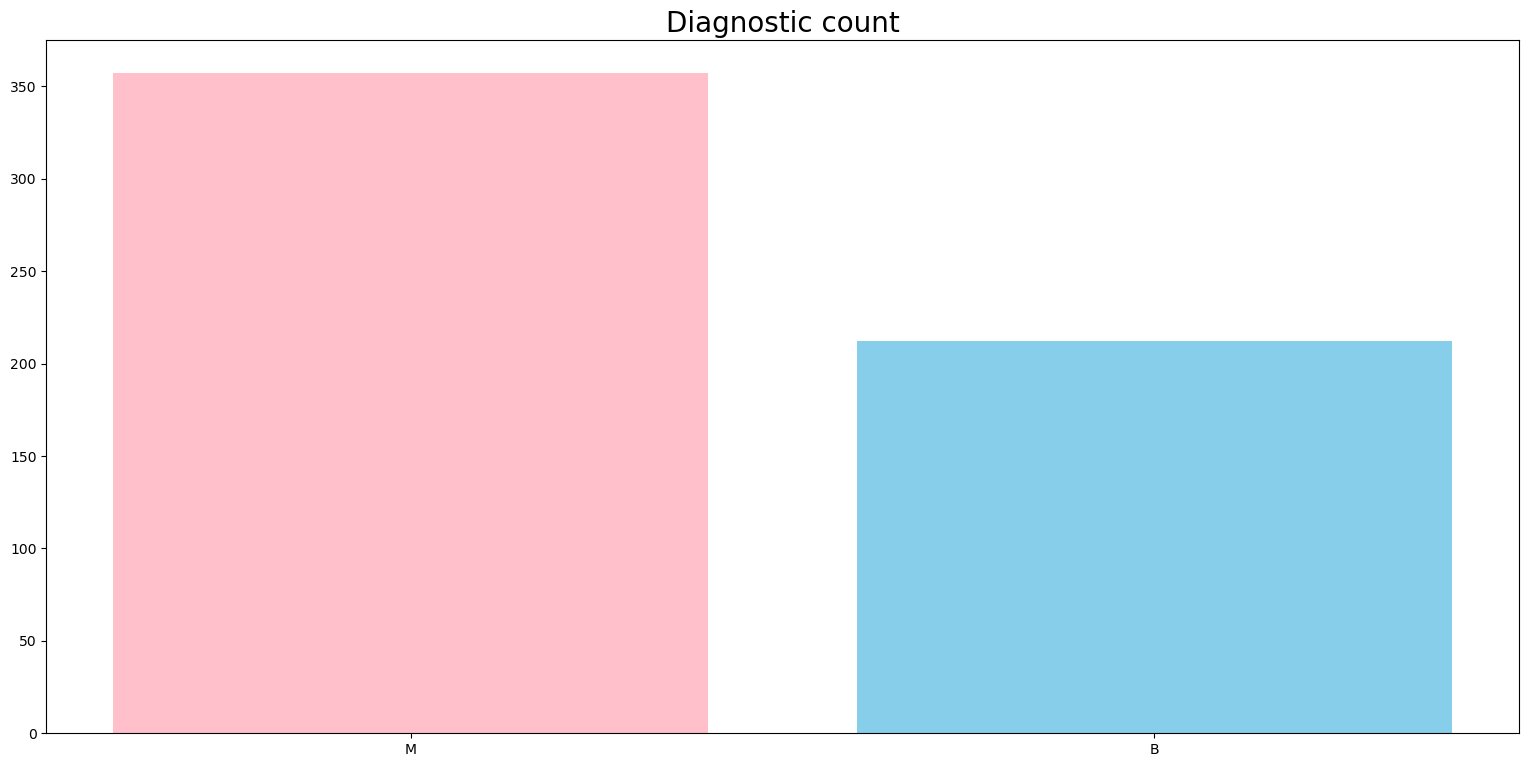

In [11]:
diagnosis_counts = df['diagnosis'].value_counts()

plt.figure(figsize=(19,9))
plt.bar(diagnosis_counts.index, diagnosis_counts.values, color=['pink', 'skyblue'])
plt.xlabel('')
plt.ylabel('')
plt.title('Diagnostic count', fontsize=20)
plt.xticks([0 ,1 ], ['M', 'B'])

plt.show()

This simple bar chart shows the distribution of diagnoses, with category "M" (malignant) represented in pink and category "B" (benign) in blue. It can be seen that there are more benign than malignant cases, which is an important detail to keep in mind when creating a model.

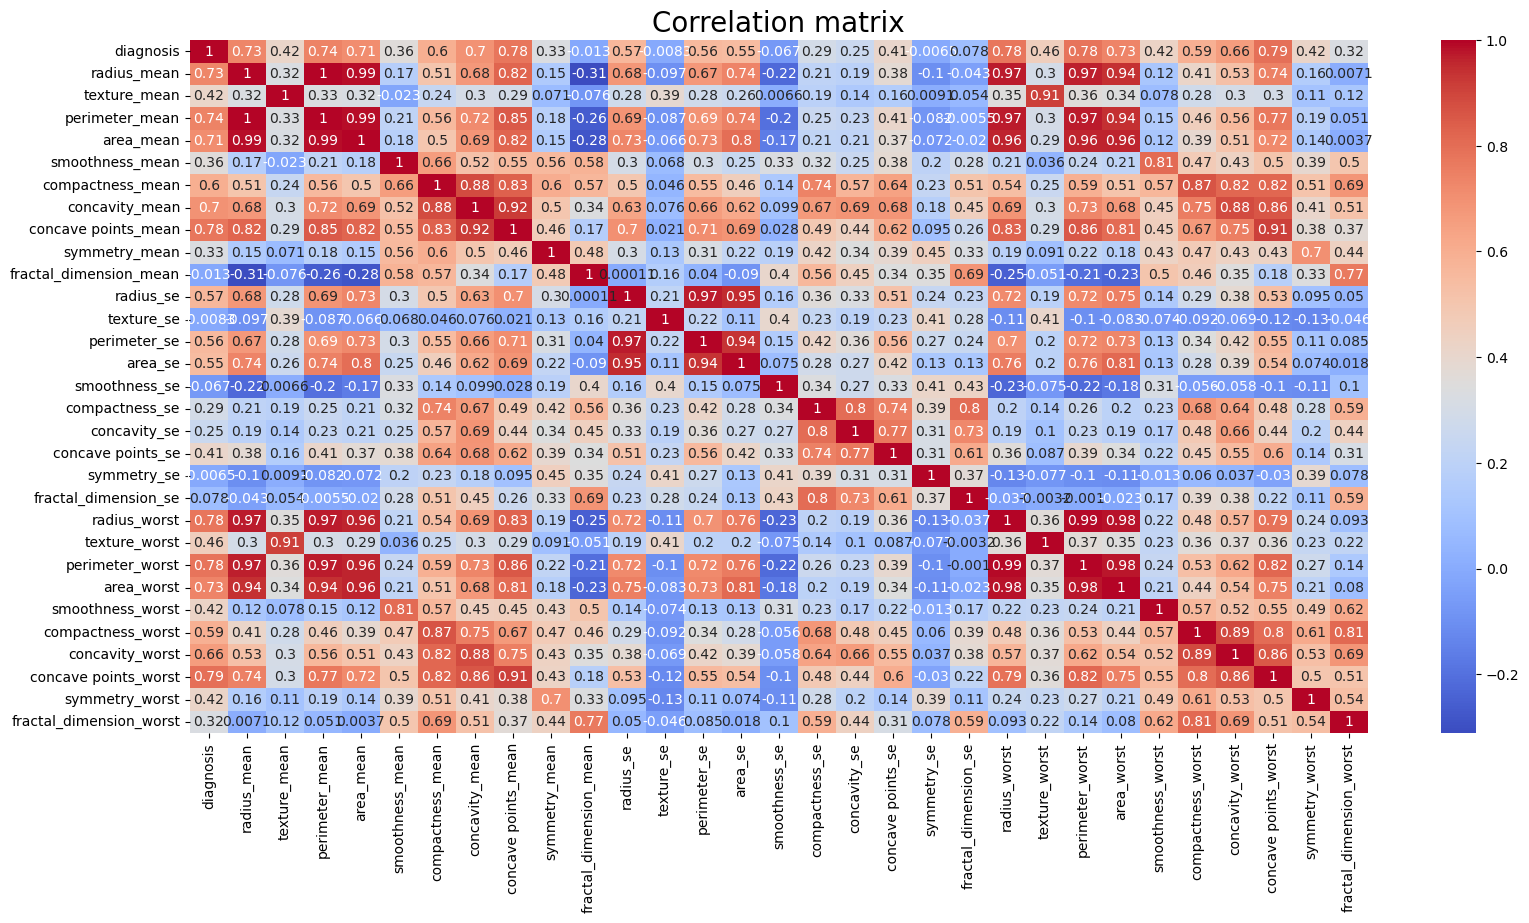

In [12]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(19,9))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation matrix', fontsize=20)

plt.show()

1. **Correlations between features**:
    - Size-related features (radius, perimeter, area) exhibit a very high correlation with each other in both `mean` and `worst` measurements, which was expected since they are related geometric measures.
    - The `worst` variables tend to have stronger correlations with each other compared to the `mean` variables, which could indicate that the more extreme values of these measures are more consistently related as tumor severity increases.

2. **Potentially redundant variables**:
    - Since many of the variables related to tumor dimensions are strongly correlated, one could fall into redundancy. For example, the `radius_worst`, `perimeter_worst`, and `area_worst` are highly correlated, possibly only one of them could be used to represent tumor size in the models.

3. **Less correlated variables**:
    - Standard error measures (`_se`) have lower correlations with diagnosis and with each other, suggesting that these could provide additional independent information in a prediction model.

4. **Implications for multivariate analysis**:
    - The existence of multicollinearity may be a problem. We could consider using regularization or eliminating some of the highly correlated variables.
    - We could choose to perform a Principal Component Analysis (PCA) to reduce the dimensionality and mitigate the multicollinearity problem.

5. **Texture feature information**:
    - `texture_mean` and `texture_worst` have more moderate correlations with diagnosticity, suggesting that they provide useful information but are not as decisive as measures of size or shape.

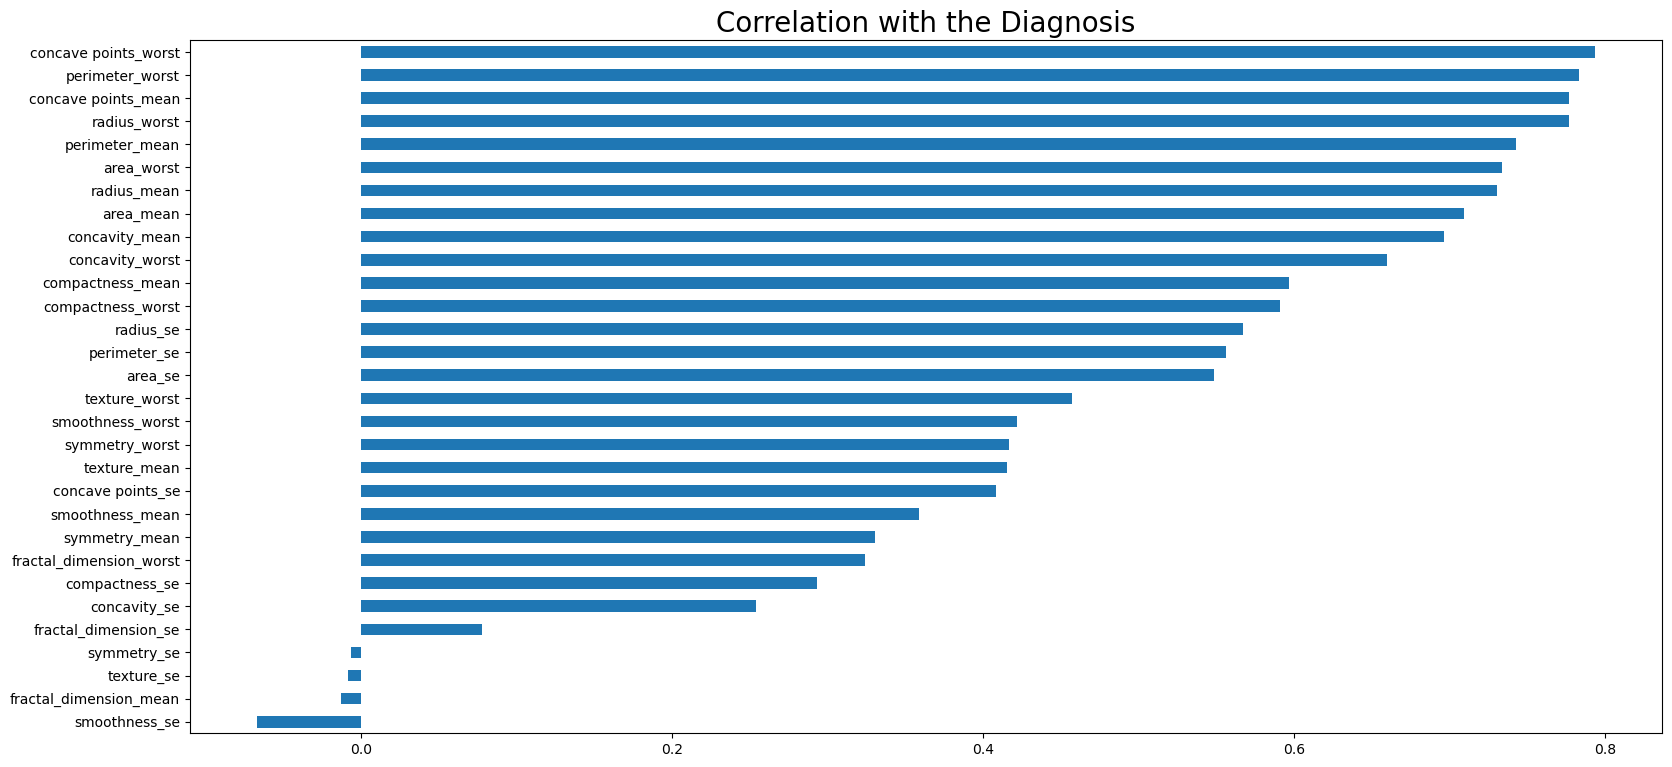

In [13]:
corr_diagnosis = corr['diagnosis']

corr_diagnosis_sorted = corr_diagnosis.sort_values()

corr_diagnosis_sorted = corr_diagnosis_sorted.drop('diagnosis')

fig, ax = plt.subplots(figsize=(19, 9))

corr_diagnosis_sorted.plot(kind='barh', ax=ax)

plt.title('Correlation with the Diagnosis', fontsize=20)

plt.show()

In this graph we can see more clearly the relationships with our target variable.

It shows that characteristics related to concave points, tumor perimeter and radius (especially the `_worst` measurements of the most severe cases) are more strongly correlated with the diagnosis of breast cancer. This suggests that tumor shape and size are the most significant indicators of cancer. Texture and smoothness measurements are of moderate significance, while standard error measurements and fractal dimension are less predictive of diagnosis.

## Models
---

We will now proceed to experiment with various classification models, with the aim of identifying the one that best fits and provides the most accurate results.

We proceed to perform the separation of the sets.

In [14]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

### 1. SVM

In [15]:
clf = svm.SVC(kernel='linear') 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [16]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:")
print(accuracy)

Confusion Matrix:
[[71  4]
 [ 2 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        75
           1       0.90      0.95      0.92        39

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114


Model Accuracy:
0.9473684210526315


### 2. Decision tree

In [17]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

In [18]:
conf_matrix = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_predict)
print("\nClassification Report:")
print(class_report)

accuracy = accuracy_score(y_test, y_predict)
print("\nModel Accuracy:")
print(accuracy)

Confusion Matrix:
[[72  3]
 [ 2 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        75
           1       0.93      0.95      0.94        39

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Model Accuracy:
0.956140350877193


### 3. Regresion logistica

In [19]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

In [20]:
conf_matrix = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_predict)
print("\nClassification Report:")
print(class_report)

accuracy = accuracy_score(y_test, y_predict)
print("\nModel Accuracy:")
print(accuracy)

Confusion Matrix:
[[73  2]
 [ 1 38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        75
           1       0.95      0.97      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Model Accuracy:
0.9736842105263158


## Conclusions 

--- 

Based on the results of the three classification models chosen:

1. **Overall performance**:
   - All models show a high degree of accuracy:
       1. Logistic regression has achieved the best performance with 97.4%. 2.
       2. Followed by the decision tree with 95.6%. 3.
       3. And lastly the support vector machine (SVM) with 94.7%.

2. **Sensitivity and Specificity**:
   - Logistic regression and decision tree perform particularly well in terms of sensitivity, indicating that they are quite effective.

3. **Accuracy**:
   - Logistic regression and decision tree have high accuracy scores, suggesting that when they predict a tumor as malignant, it is very likely that it is actually malignant.

4. **Class balance**:
   - Although the dataset appears to be unbalanced (as we saw in the Diagnostic count plot), the models are handling this imbalance well, which is reflected in the high f1 scores for both classes in all models.

5. **Selecting the right model**:
   - If the ultimate goal is to minimize false negatives, and balance between correctly identifying benign and malignant cases, logistic regression might be the best choice.

6. **Potential for optimization**:
   - Although logistic regression has shown the best accuracy in this instance, there is still room for improvement by optimizing hyperparameters or implementing ensemble techniques for all models.

All three proposed models demonstrated good performance and showed notoriously high efficiency and suitability for breast tumor classification work. However, logistic regression stands out for its simplicity and balance between accuracy and sensitivity, which is crucial in medical applications where misclassification costs can be very high.